In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

from utils.wsi.tiles import generate_tiles
from utils.wsi.patches import generate_patch_tiles
from utils.wsi.patches import generate_patch_fast


     - Powered by -     
   _______   __________   
  / __/ _ | / __/_  __/   https://fast.eriksmistad.no
 / _// __ |_\ \  / /               v4.4.0
/_/ /_/ |_/___/ /_/       



In [2]:
from pathlib import Path
svs_file = Path("./data/wsi/Training_phase_1_001/01_01_0083.svs")
patches = generate_patch_fast(svs_file, (1024, 1024), 0)

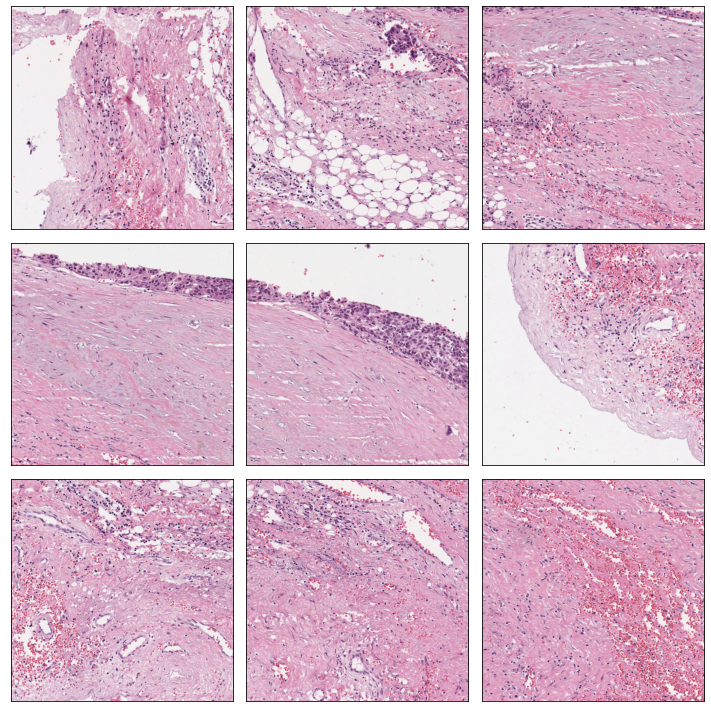

In [3]:
fig, axes = plt.subplots(3, 3, figsize = (10, 10))
for i, ax in enumerate(axes.flat):
  ax.imshow(patches[i])
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()
plt.show()

In [4]:
from utils.wsi.patches import generate_patch_svs_thresholding
patches = generate_patch_svs_thresholding(svs_file, (1024, 1024), 0)

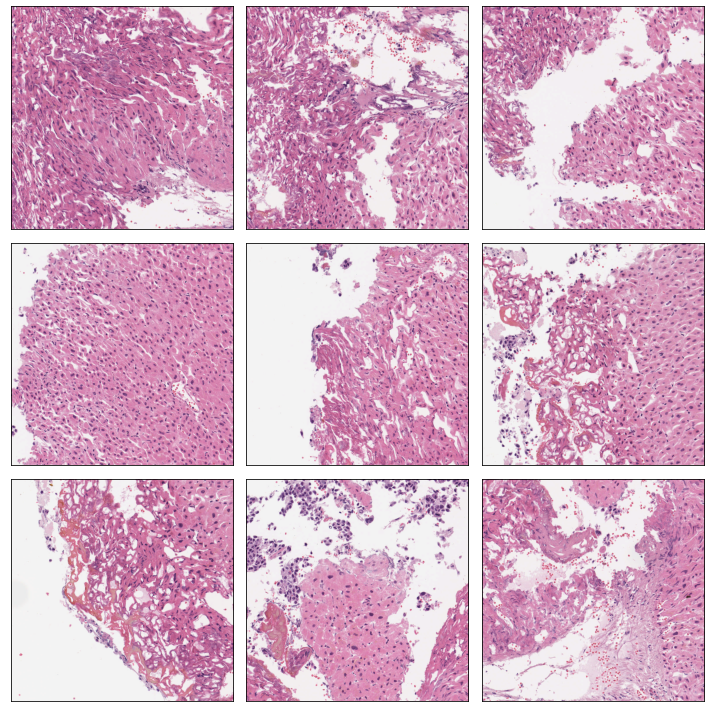

In [5]:
fig, axes = plt.subplots(3, 3, figsize = (10, 10))
for i, ax in enumerate(axes.flat):
  ax.imshow(next(patches))
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()
plt.show()

In [6]:
from utils.wsi.patches import generate_patches

generate_patches?

Signature:
generate_patches(
    source_file: pathlib.Path,
    dest_dir: pathlib.Path,
    pyramid: int = 0,
    size: Tuple[int, int] = (512, 512),
    threshold: float = 50.0,
    tile_size: int = 512,
    overlap: int = 0,
    depth: int = 2,
) -> pathlib.Path
Docstring: Generate Training patches from svs files
File:      ~/source/dl/lihc/utils/wsi/patches.py
Type:      function


In [7]:
generate_patches(
    Path("data/wsi/Training_phase_1_001/01_01_0083.svs"),
    Path("data/train"),
)

Generating tiles...
Generating training patches...


PosixPath('data/train/01_01_0083/patches')

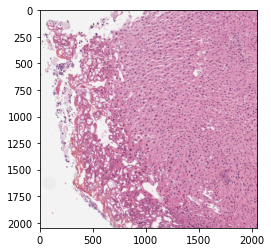

In [8]:
import openslide

path = "data/wsi/Training_phase_1_001/01_01_0083.svs"

slide = openslide.OpenSlide(path)

x, y = slide.dimensions

s_x = x // 1024
s_y = y // 1024

s = slide.read_region((3000, 3000), 0, (2048, 2048))

plt.imshow(s)

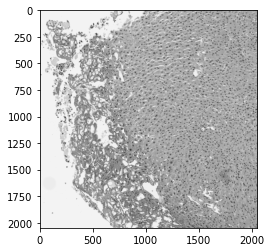

In [9]:
img = cv.cvtColor(np.array(s), cv.COLOR_RGB2GRAY)
plt.imshow(img, cmap="gray")

In [10]:
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur, 200, 255, cv.THRESH_BINARY)

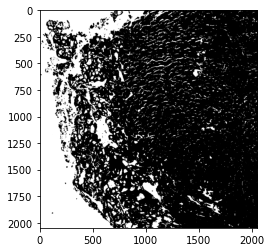

In [11]:
plt.imshow(th3, cmap="gray")

In [12]:
print(th3[100])
print(img[100])

[255 255 255 ...   0   0   0]
[243 243 243 ... 173 183 188]


In [13]:
total = 2048 * 2048
cells = cv.countNonZero(th3)

100 - ((cells / total) * 100)

72.67439365386963